In [11]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import hvplot.pandas
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()


True

In [13]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
type(alpaca_api_key )
type(alpaca_secret_key )

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key,
                             alpaca_secret_key,
                             api_version="v2")

In [14]:
# Create the list for the required tickers
tickers = ['SPY', 'GLD', 'XLE', 'XLV','XLP', 'QQQ', 'AMT','VNQ','VPU','BND','AAPL','JPM']
tickers

['SPY',
 'GLD',
 'XLE',
 'XLV',
 'XLP',
 'QQQ',
 'AMT',
 'VNQ',
 'VPU',
 'BND',
 'AAPL',
 'JPM']

In [15]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp('2014-08-01',tz = "America/New_york").isoformat()
end_date = pd.Timestamp('2022-08-01',tz="America/New_york").isoformat()

In [16]:
# Set timeframe to one day (1Day)
timeframe = '1Day'

In [17]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(tickers,
                            timeframe,
                            start = start_date,
                            end = end_date).df

# Reorganize the DataFrame 'SPY', 'GLD', 'XLE', 'XLV','XLP', 'QQQ', 'AMT', 'AMC','VNQ','VPU','BTC','MVI-USD','BND','VIX','JPM
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
GLD = prices_df[prices_df['symbol']=='GLD'].drop('symbol', axis=1)
XLE = prices_df[prices_df['symbol']=='XLE'].drop('symbol', axis=1)
XLV = prices_df[prices_df['symbol']=='XLV'].drop('symbol', axis=1)
XLP = prices_df[prices_df['symbol']=='XLP'].drop('symbol', axis=1)
QQQ = prices_df[prices_df['symbol']=='QQQ'].drop('symbol', axis=1)
AMT = prices_df[prices_df['symbol']=='AMT'].drop('symbol', axis=1)
#AMC = prices_df[prices_df['symbol']=='AMC'].drop('symbol', axis=1)
VNQ = prices_df[prices_df['symbol']=='VNQ'].drop('symbol', axis=1)
VPU = prices_df[prices_df['symbol']=='VPU'].drop('symbol', axis=1)
#BTCUSD = prices_df[prices_df['symbol']=='BTCUSD'].drop('symbol', axis=1)
#MVI_USD = prices_df[prices_df['symbol']=='MVI-USD'].drop('symbol', axis=1)
BND = prices_df[prices_df['symbol']=='BND'].drop('symbol', axis=1)
#^VIX = prices_df[prices_df['symbol']=='^VIX'].drop('symbol', axis=1)
AAPL = prices_df[prices_df['symbol']=='AAPL'].drop('symbol', axis=1)
JPM = prices_df[prices_df['symbol']=='JPM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, GLD, XLE, XLV, XLP, QQQ, AMT, VNQ, VPU,BND,AAPL,JPM ], axis=1, keys=["SPY","GLD","XLE","XLV","XLP","QQQ", "AMT","VNQ","VPU","BND","AAPL","JPM"])

# Review the first five rows of the resulting DataFrame 
prices_df.head()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2015-12-01 05:00:00+00:00  209.42  210.8200  209.1100  210.68   97858418   
2015-12-02 05:00:00+00:00  210.60  211.0000  208.2300  208.54  108069059   
2015-12-03 05:00:00+00:00  208.90  209.1500  204.7511  205.58  166224154   
2015-12-04 05:00:00+00:00  206.10  209.9700  205.9300  209.66  192878747   
2015-12-07 05:00:00+00:00  209.20  209.7295  207.2000  208.27  102027111   

                                                      GLD                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2015-12-01 05:00:00+00:00      337780  209.921410  102.28  102.43  101.810   
2015-12-02 05:00:00+00:00      367013  209.563055  101.35  101.35  100.530   
2015-12-03 05:00:00+00:00      546768  206.878936  101.20  101.97  100.845   
2015-12-04 05:00:00+00:00      556731  208.178631  102.72  104.21  102.650   
2015-12-07 05:00:00+00:00      374705  208.276128  103.32  103.37  102.500   

                           ...      AAPL                            JPM  \
                           ...    volume trade_count        vwap   open   
timestamp                  ...                                            
2015-12-01 05:00:00+00:00  ...  34852374      187129  117.756760  67.34   
2015-12-02 05:00:00+00:00  ...  33385643      180616  117.151198  67.83   
2015-12-03 05:00:00+00:00  ...  41560785      245330  115.434888  66.84   
2015-12-04 05:00:00+00:00  ...  57776977      307788  118.187290  66.09   
2015-12-07 05:00:00+00:00  ...  32080754      190809  118.509111  67.62   

                                                                       \
                             high    low  close    volume trade_count   
timestamp                                                               
2015-12-01 05:00:00+00:00  67.830  66.99  67.61  12708809       77160   
2015-12-02 05:00:00+00:00  67.880  66.48  66.66  13440883       82202   
2015-12-03 05:00:00+00:00  67.030  65.58  65.80  14626881       93602   
2015-12-04 05:00:00+00:00  67.995  66.03  67.89  17786143      103719   
2015-12-07 05:00:00+00:00  67.750  66.40  67.00  11701751       77152   

                                      
                                vwap  
timestamp                             
2015-12-01 05:00:00+00:00  67.407119  
2015-12-02 05:00:00+00:00  67.002375  
2015-12-03 05:00:00+00:00  66.213768  
2015-12-04 05:00:00+00:00  67.491175  
2015-12-07 05:00:00+00:00  66.895082  

[5 rows x 84 columns]

In [18]:
# Review the last five rows of the resulting DataFrame
prices_df.tail()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-26 04:00:00+00:00  393.84  394.06  389.95  390.89  52767480   
2022-07-27 04:00:00+00:00  394.43  402.88  394.05  401.04  81319074   
2022-07-28 04:00:00+00:00  401.84  406.80  398.15  406.07  73966563   
2022-07-29 04:00:00+00:00  407.70  413.02  406.77  411.99  86779944   
2022-08-01 04:00:00+00:00  409.16  413.41  408.40  410.77  69633616   

                                                      GLD                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-07-26 04:00:00+00:00      436591  391.857608  160.23  160.50  159.79   
2022-07-27 04:00:00+00:00      587430  398.307462  160.02  162.21  159.51   
2022-07-28 04:00:00+00:00      570079  403.644305  163.31  163.76  162.88   
2022-07-29 04:00:00+00:00      544810  410.668581  163.89  164.69  163.28   
2022-08-01 04:00:00+00:00      516221  411.079113  165.00  165.41  164.41   

                           ...       AAPL                             JPM  \
                           ...     volume trade_count        vwap    open   
timestamp                  ...                                              
2022-07-26 04:00:00+00:00  ...   55138691      472002  151.679587  114.91   
2022-07-27 04:00:00+00:00  ...   78244429      574803  155.243353  114.10   
2022-07-28 04:00:00+00:00  ...   81378731      738631  157.465407  115.25   
2022-07-29 04:00:00+00:00  ...  101863174      773684  162.249834  115.59   
2022-08-01 04:00:00+00:00  ...   67855255      594000  162.105292  114.50   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2022-07-26 04:00:00+00:00  115.580  113.030  113.42  10647387      103721   
2022-07-27 04:00:00+00:00  115.740  113.300  115.24   9145581       96051   
2022-07-28 04:00:00+00:00  115.980  113.530  114.81  10384770      105274   
2022-07-29 04:00:00+00:00  116.500  114.785  115.36  12911243      128273   
2022-08-01 04:00:00+00:00  115.105  113.070  114.21  14677895      148904   

                                       
                                 vwap  
timestamp                              
2022-07-26 04:00:00+00:00  113.913291  
2022-07-27 04:00:00+00:00  114.559250  
2022-07-28 04:00:00+00:00  114.712547  
2022-07-29 04:00:00+00:00  115.474322  
2022-08-01 04:00:00+00:00  114.058315  

[5 rows x 84 columns]

In [19]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    closing_prices_df[ticker] = prices_df[ticker]["close"] 

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2015-12-01,210.68,102.28,68.56,72.31,49.84,115.16,101.17,80.49,93.51,81.44,117.34,67.61
2015-12-02,208.54,100.69,66.44,71.70,49.59,114.45,99.46,78.85,91.57,81.34,116.28,66.66
2015-12-03,205.58,101.76,65.11,70.13,49.33,112.51,97.89,77.61,90.70,80.71,115.20,65.80
2015-12-04,209.66,104.02,64.74,71.78,50.46,115.14,97.55,79.08,91.87,81.03,119.03,67.89
2015-12-07,208.27,102.67,62.26,71.38,50.58,114.62,97.69,78.85,92.12,81.17,118.28,67.00


,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2022-07-26,390.89,160.04,73.09,131.18,73.39,294.37,258.98,94.77,154.08,76.22,151.60,113.42
2022-07-27,401.04,161.67,74.74,132.00,73.89,306.81,258.28,95.34,154.36,76.43,156.79,115.24
2022-07-28,406.07,163.64,75.16,132.84,75.07,309.81,268.90,98.43,159.69,76.96,157.35,114.81
2022-07-29,411.99,164.10,78.42,132.40,74.49,315.46,270.83,98.96,161.05,76.90,162.51,115.36
2022-08-01,410.77,165.03,76.80,131.42,75.42,315.27,268.62,98.16,161.13,77.08,161.51,114.21


In [20]:
# For the closing price DataFrame, replace or drop all NaNs or missing values in the DataFrame

#find the missing values
closing_prices_df.isnull().sum()

#drop the missing values
closing_prices_df.dropna()

# Replace the NaNs with "mean"
closing_prices_df = closing_prices_df.fillna(closing_prices_df.mean())

#Varify the missing values
closing_prices_df.isnull().sum()

SPY     0
GLD     0
XLE     0
XLV     0
XLP     0
QQQ     0
AMT     0
VNQ     0
VPU     0
BND     0
AAPL    0
JPM     0
dtype: int64

In [21]:
# Review the data for duplicate values, and drop them if necessary
closing_prices_df.duplicated().sum()

0

In [22]:
# Convert the Close data type to a float
closing_prices_df = closing_prices_df.astype("float")
closing_prices_df.dtypes

SPY     float64
GLD     float64
XLE     float64
XLV     float64
XLP     float64
QQQ     float64
AMT     float64
VNQ     float64
VPU     float64
BND     float64
AAPL    float64
JPM     float64
dtype: object

In [23]:
# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2015-12-01,210.68,102.28,68.56,72.31,49.84,115.16,101.17,80.49,93.51,81.44,117.34,67.61
2015-12-02,208.54,100.69,66.44,71.70,49.59,114.45,99.46,78.85,91.57,81.34,116.28,66.66
2015-12-03,205.58,101.76,65.11,70.13,49.33,112.51,97.89,77.61,90.70,80.71,115.20,65.80
2015-12-04,209.66,104.02,64.74,71.78,50.46,115.14,97.55,79.08,91.87,81.03,119.03,67.89
2015-12-07,208.27,102.67,62.26,71.38,50.58,114.62,97.69,78.85,92.12,81.17,118.28,67.00


,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2022-07-26,390.89,160.04,73.09,131.18,73.39,294.37,258.98,94.77,154.08,76.22,151.60,113.42
2022-07-27,401.04,161.67,74.74,132.00,73.89,306.81,258.28,95.34,154.36,76.43,156.79,115.24
2022-07-28,406.07,163.64,75.16,132.84,75.07,309.81,268.90,98.43,159.69,76.96,157.35,114.81
2022-07-29,411.99,164.10,78.42,132.40,74.49,315.46,270.83,98.96,161.05,76.90,162.51,115.36
2022-08-01,410.77,165.03,76.80,131.42,75.42,315.27,268.62,98.16,161.13,77.08,161.51,114.21


In [24]:
closing_prices_df.corr()

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
SPY,1.000000,0.849207,-0.267735,0.986025,0.944164,0.987460,0.885901,0.784544,0.887663,0.258136,0.117782,0.906979
GLD,0.849207,1.000000,-0.562636,0.867096,0.877209,0.893334,0.885472,0.553487,0.801588,0.529388,0.220987,0.639198
XLE,-0.267735,-0.562636,1.000000,-0.283435,-0.254086,-0.392769,-0.525872,0.056799,-0.239486,-0.840350,-0.296232,-0.162747
XLV,0.986025,0.867096,-0.283435,1.000000,0.949398,0.976579,0.904643,0.750848,0.903248,0.228127,0.155005,0.860722
XLP,0.944164,0.877209,-0.254086,0.949398,1.000000,0.929299,0.856402,0.819579,0.908868,0.269653,0.067025,0.776866
QQQ,0.987460,0.893334,-0.392769,0.976579,0.929299,1.000000,0.899982,0.725583,0.852141,0.361482,0.125674,0.864131
AMT,0.885901,0.885472,-0.525872,0.904643,0.856402,0.899982,1.000000,0.626289,0.906469,0.447951,0.394592,0.784434
VNQ,0.784544,0.553487,0.056799,0.750848,0.819579,0.725583,0.626289,1.000000,0.765689,0.152539,-0.086037,0.709275
VPU,0.887663,0.801588,-0.239486,0.903248,0.908868,0.852141,0.906469,0.765689,1.000000,0.219159,0.269660,0.804535
BND,0.258136,0.529388,-0.840350,0.228127,0.269653,0.361482,0.447951,0.152539,0.219159,1.000000,0.236544,0.175336


***Generate a daily returns DataFrame that’s based on the closing prices of each stock.***


In [25]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df =closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2015-12-02,-0.010158,-0.015546,-0.030922,-0.008436,-0.005016,-0.006165,-0.016902,-0.020375,-0.020746,-0.001228,-0.009034,-0.014051
2015-12-03,-0.014194,0.010627,-0.020018,-0.021897,-0.005243,-0.016951,-0.015785,-0.015726,-0.009501,-0.007745,-0.009288,-0.012901
2015-12-04,0.019846,0.022209,-0.005683,0.023528,0.022907,0.023376,-0.003473,0.018941,0.012900,0.003965,0.033247,0.031763
2015-12-07,-0.006630,-0.012978,-0.038307,-0.005573,0.002378,-0.004516,0.001435,-0.002908,0.002721,0.001728,-0.006301,-0.013109
2015-12-08,-0.006146,0.001656,-0.010601,0.002242,-0.002570,0.000087,-0.008292,-0.000634,-0.001086,0.000246,-0.000423,-0.015522


,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2022-07-26,-0.011831,-0.001186,-0.009084,0.005134,-0.002311,-0.019649,0.006373,0.001056,0.005482,0.000262,-0.008826,-0.015622
2022-07-27,0.025966,0.010185,0.022575,0.006251,0.006813,0.042260,-0.002703,0.006015,0.001817,0.002755,0.034235,0.016047
2022-07-28,0.012542,0.012185,0.005619,0.006364,0.015970,0.009778,0.041118,0.032410,0.034530,0.006934,0.003572,-0.003731
2022-07-29,0.014579,0.002811,0.043374,-0.003312,-0.007726,0.018237,0.007177,0.005385,0.008517,-0.000780,0.032793,0.004791
2022-08-01,-0.002961,0.005667,-0.020658,-0.007402,0.012485,-0.000602,-0.008160,-0.008084,0.000497,0.002341,-0.006153,-0.009969


In [26]:
# Find the correlation of daily returns between different sectors 
daily_returns_df.corr().style.background_gradient(cmap='coolwarm')

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
SPY,1.000000,-0.005410,0.658688,0.850315,0.756527,0.924207,0.574180,0.750901,0.606728,0.068629,0.556016,0.744612
GLD,-0.005410,1.000000,0.019317,0.001092,0.061502,0.011296,0.096192,0.092662,0.159412,0.322577,0.000787,-0.155740
XLE,0.658688,0.019317,1.000000,0.507365,0.438758,0.463913,0.284015,0.531600,0.401505,-0.015793,0.286839,0.669861
XLV,0.850315,0.001092,0.507365,1.000000,0.718712,0.760320,0.565181,0.651305,0.586671,0.053410,0.428900,0.590758
XLP,0.756527,0.061502,0.438758,0.718712,1.000000,0.625229,0.611278,0.699806,0.736928,0.147115,0.378992,0.518705
QQQ,0.924207,0.011296,0.463913,0.760320,0.625229,1.000000,0.508291,0.604824,0.451911,0.076748,0.594190,0.552871
AMT,0.574180,0.096192,0.284015,0.565181,0.611278,0.508291,1.000000,0.725227,0.646760,0.171258,0.298805,0.349178
VNQ,0.750901,0.092662,0.531600,0.651305,0.699806,0.604824,0.725227,1.000000,0.756987,0.213829,0.362148,0.575339
VPU,0.606728,0.159412,0.401505,0.586671,0.736928,0.451911,0.646760,0.756987,1.000000,0.200365,0.261731,0.419819
BND,0.068629,0.322577,-0.015793,0.053410,0.147115,0.076748,0.171258,0.213829,0.200365,1.000000,0.026686,-0.068010


***Quantitative Analysis***

***The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification.WE’ll analyze each component one at a time.***

***Analyze the Performance
Analyze the data to determine if any of the portfolios outperform the broader stock market, which the SPY represents.***

***Step 1: Use the default Pandas plot function to visualize the daily return data of the different economic sectors and the SPY. Be sure to include the title parameter, and adjust the figure size if necessary.***

In [27]:
# Plot the daily return data of the economic sectors and SPY 
# Inclue a title parameter and adjust the figure size
daily_returns_df.hvplot(xlabel='Time',
                        ylabel='Daily_Returns',
                        height = 500,
                        width= 1100,
                        hover_color='blue',
                        rot=45,
                        grid=True,
                        title = "Daily Returns - Economic Sectors and SPY"
                        )

:NdOverlay   [Variable]
   :Curve   [index]   (value)

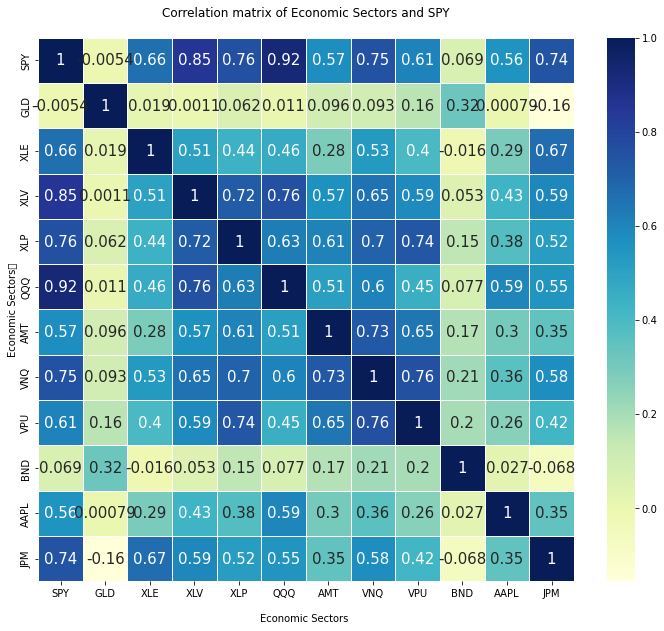

<Figure size 432x288 with 0 Axes>

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
hm = sns.heatmap(daily_returns_df.corr(), annot = True,annot_kws={'size': 15}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Correlation matrix of Economic Sectors and SPY\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [30]:
# Plot the correlation of daily returns between different sectors 
daily_returns_df.corr().hvplot(kind='bar',
                               height = 400,
                               width= 3000,
                               rot=45,
                               grid=True,
                               title = "Daily Returns correlation - Economic Sectors and SPY"
                              )

:Bars   [index,Variable]   (value)

**Step 2: Use the Pandas cumprod function to calculate the cumulative returns for the economic sector portfolios and the SPY. Review the last five rows of the cumulative returns DataFrame by using the Pandas tail function.**

In [31]:
# Calculate and plot the cumulative returns of the economic sector portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns_df = (1 + daily_returns_df).cumprod()
cumulative_returns_df.tail()

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
2022-07-26,1.855373,1.564724,1.066074,1.814134,1.472512,2.556183,2.559850,1.177413,1.647738,0.935904,1.291972,1.677562
2022-07-27,1.903550,1.580661,1.090140,1.825474,1.482544,2.664206,2.552931,1.184495,1.650733,0.938482,1.336202,1.704482
2022-07-28,1.927425,1.599922,1.096266,1.837090,1.506220,2.690257,2.657903,1.222885,1.707732,0.944990,1.340975,1.698122
2022-07-29,1.955525,1.604419,1.143816,1.831005,1.494583,2.739319,2.676979,1.229469,1.722276,0.944253,1.384950,1.706256
2022-08-01,1.949734,1.613512,1.120187,1.817453,1.513242,2.737669,2.655135,1.219530,1.723131,0.946464,1.376427,1.689247


**Step 3: Use the default Pandas plot to visualize the cumulative return values for the economic sectors and the SPY over time. Be sure to include the title parameter, and adjust the figure size if necessary.**

In [32]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns_df.hvplot(height = 400,
                               width= 900,
                               rot=45,
                               grid=True,
                               title = "Cumulative Returns - Economic Sectors and SPY")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

**Find the correlation between different sectors on basis of cumulative return and visualise on Heat Map**

In [33]:
## Find the correlation between different sectors on the basis of cumulative returns
cumulative_returns_df.corr().style.background_gradient(cmap='coolwarm')

,SPY,GLD,XLE,XLV,XLP,QQQ,AMT,VNQ,VPU,BND,AAPL,JPM
SPY,1.000000,0.849071,-0.267455,0.986017,0.944115,0.987452,0.885797,0.784501,0.887670,0.257980,0.117267,0.906897
GLD,0.849071,1.000000,-0.562554,0.867011,0.877086,0.893279,0.885330,0.553328,0.801265,0.529434,0.220427,0.638720
XLE,-0.267455,-0.562554,1.000000,-0.283177,-0.253788,-0.392564,-0.525741,0.057055,-0.239092,-0.840338,-0.296033,-0.162359
XLV,0.986017,0.867011,-0.283177,1.000000,0.949363,0.976562,0.904577,0.750775,0.903333,0.227964,0.154550,0.860617
XLP,0.944115,0.877086,-0.253788,0.949363,1.000000,0.929247,0.856255,0.819568,0.908876,0.269501,0.066449,0.776631
QQQ,0.987452,0.893279,-0.392564,0.976562,0.929247,1.000000,0.899912,0.725497,0.852147,0.361373,0.125202,0.864030
AMT,0.885797,0.885330,-0.525741,0.904577,0.856255,0.899912,1.000000,0.626169,0.906412,0.447908,0.394217,0.784177
VNQ,0.784501,0.553328,0.057055,0.750775,0.819568,0.725497,0.626169,1.000000,0.765891,0.152408,-0.086403,0.709223
VPU,0.887670,0.801265,-0.239092,0.903333,0.908876,0.852147,0.906412,0.765891,1.000000,0.218966,0.269056,0.804278
BND,0.257980,0.529434,-0.840338,0.227964,0.269501,0.361373,0.447908,0.152408,0.218966,1.000000,0.236412,0.175119


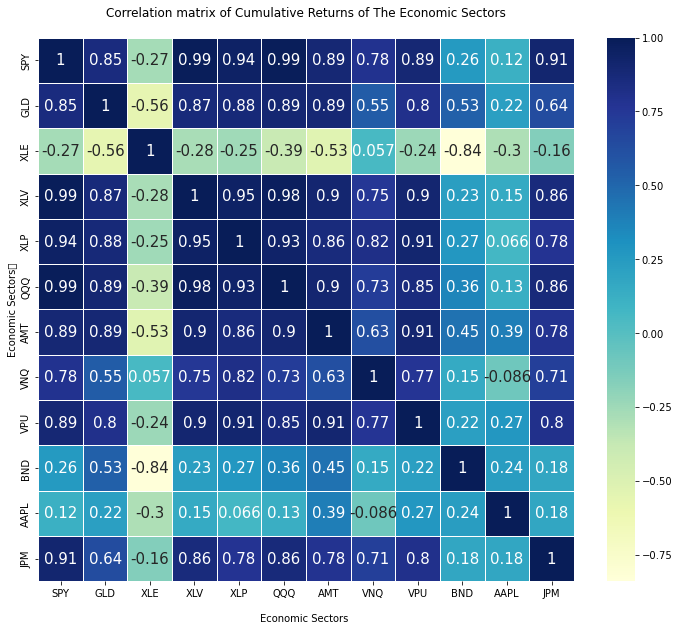

<Figure size 432x288 with 0 Axes>

In [34]:
#Visualise the correlation using Heatmap
fig, ax = plt.subplots(figsize=(12,10))
hm = sns.heatmap(cumulative_returns_df.corr(), annot = True,annot_kws={'size': 15}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Correlation matrix of Cumulative Returns of The Economic Sectors\n")
plt.show()
plt.savefig("Plotting_cumulative_Correlation_HeatMap.jpg")

**Use the default Pandas plot to visualize the cumulative return correlation values for the economic sectors and the SPY over time. Be sure to include the title parameter, and adjust the figure size if necessary.**

In [35]:
# Plot the correlation of cumulative returns between different sectors 
cumulative_returns_df.corr().hvplot(height = 400,
                               width= 900,
                               rot=45,
                               grid=True,
                               title = "Cumulative Returns correlation - Economic Sectors and S&P 500"
                              )

:NdOverlay   [Variable]
   :Curve   [index]   (value)

***Analyze the Volatility
Analyze the volatility of each of the economic sectors portfolios and of the SPY Index by using box plots.***

***Step 1: Use the Pandas plot function and the kind="box" parameter to visualize the daily return data for each of the economic sectors and for the S&P 500 in a box plot. Be sure to include the title parameter, and adjust the figure size if necessary.***

<AxesSubplot:title={'center':'Daily Return data - Economic Sectors and SPY'}>

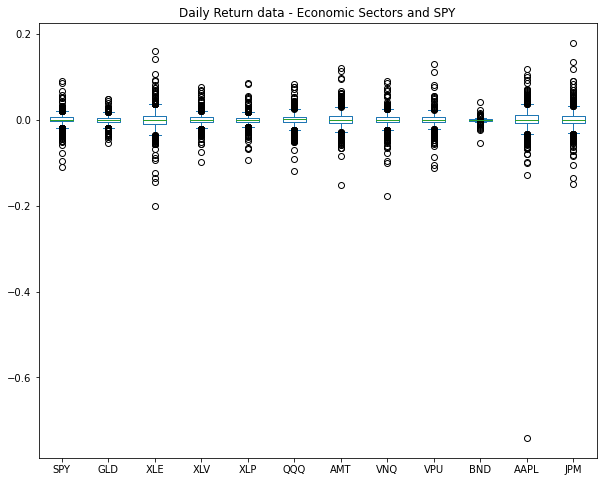

In [81]:
# Use the daily return data to create box plots to visualize the volatility of the economic sectors and the SPY
# Include a title parameter and adjust the figure size

daily_returns_df.plot(kind = 'box', figsize =(10,8),title = "Daily Return data - Economic Sectors and SPY")

**Step 2: Use the Pandas drop function to create a new DataFrame that contains the data for just the economic sector portfolios by dropping the SPY column. Visualize the daily return data for just the economic sector portfolios by using another box plot. Be sure to include the title parameter, and adjust the figure size if necessary.**

<AxesSubplot:title={'center':'Daily Return Value of Economic Sector'}>

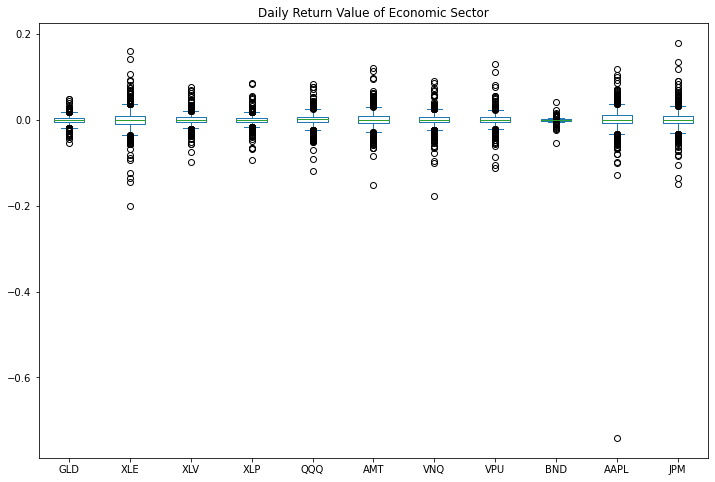

In [82]:
# Create a new DataFrame containing only the economic sector portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the economic sector portfolios
# Include a title parameter and adjust the figure size
economic_sector_df = daily_returns_df.drop(columns=["SPY"])
economic_sector_df.plot(kind = 'box',figsize =(12,8), title = "Daily Return Value of Economic Sector")

***Analyze the Risk***

***Evaluate the risk profile of each portfolio by using the standard deviation and the beta.***

***Step 1: Use the Pandas std function to calculate the standard deviation for each of the economic sector portfolios and for the SPY. Review the standard deviation calculations, sorted from smallest to largest.***

In [83]:
# Calculate and sort the standard deviation for all economic sector portfolios and the SPY
# Review the standard deviations sorted smallest to largest
econ_sec_std = daily_returns_df.std()
econ_sec_std.sort_values()

BND     0.003222
GLD     0.008833
XLP     0.009922
XLV     0.011249
SPY     0.011816
VPU     0.012539
VNQ     0.013641
QQQ     0.014339
AMT     0.016111
JPM     0.018518
XLE     0.020550
AAPL    0.026118
dtype: float64

**Step 2: Calculate the annualized standard deviation for each of the economic sector portfolios and for the SPY. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.**

In [84]:
# Calculate and sort the annualized standard deviation (252 trading days) of the economic sector portfolios and the SPY
# Review the annual standard deviations smallest to largest
annualized_std = econ_sec_std * np.sqrt(252)
annualized_std.sort_values()

BND     0.051149
GLD     0.140220
XLP     0.157500
XLV     0.178567
SPY     0.187580
VPU     0.199044
VNQ     0.216545
QQQ     0.227625
AMT     0.255747
JPM     0.293959
XLE     0.326216
AAPL    0.414609
dtype: float64

***Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the economic sector portfolios and of the SPY index. Be sure to include the title parameter, and adjust the figure size if necessary.***

In [85]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the economic sector portfolios and the SPY
# Include a title parameter and adjust the figure size
daily_returns_df.rolling(window = 21).std().hvplot(height = 400,
                                                   width= 900,
                                                   rot=45,
                                                   grid=True,
                                                   title = "21 days Standard Deviation - Economic Sectors and SPY")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

***Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the economic sector portfolios. Be sure to include the title parameter, and adjust the figure size if necessary.***

In [86]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the economic sector portfolios. 
# Include a title parameter and adjust the figure size
economic_sector_df.rolling(window = 21).std().hvplot(height = 400,
                                                     width= 900,
                                                     rot=45,
                                                     grid=True,
                                                     title = "21 days Standard Deviation - Economic Sectors")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:title={'center':'21 days Standard Deviation - Economic Sectors'}>

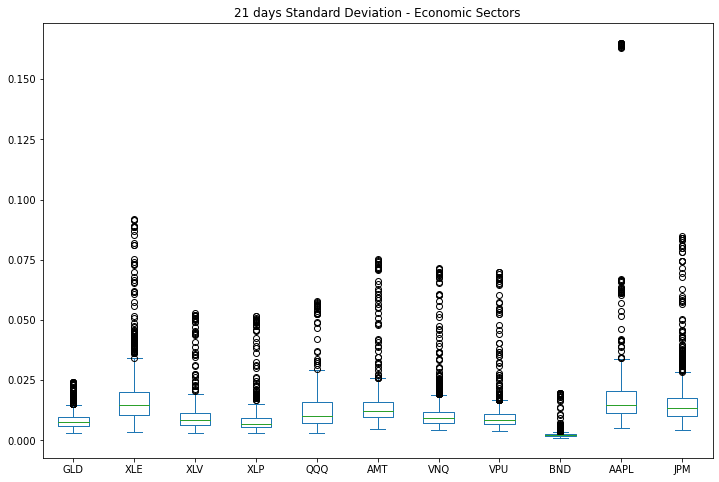

In [87]:
# Using the daily return data of four funds and a 21-day rolling window, create box plot the rolling standard deviation of just the economic sector portfolios to reflect the highest volatile portfolio 
# Include a title parameter and adjust the figure size

economic_sector_df.rolling(window = 21).std().plot(kind = 'box',figsize =(12,8), title = "21 days Standard Deviation - Economic Sectors")

***Analyze the Risk-Return Profile***

***To determine the overall risk of an asset or portfolio, you need to consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.***

**Step 1: Use the daily return DataFrame to calculate the annualized average return data for the economic sector portfolios and for the SPY. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.***

In [88]:
# Calculate the annual average return data for the economic sector portfolios and the SPY
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
year_trading_days = 252
annualized_average_return = daily_returns_df.mean() * year_trading_days 
annualized_average_return = annualized_average_return.sort_values()
annualized_average_return

BND    -0.006955
VNQ     0.053643
XLE     0.070736
XLP     0.074684
GLD     0.081736
VPU     0.101591
XLV     0.105762
SPY     0.118043
JPM     0.121874
QQQ     0.177407
AMT     0.179501
AAPL    0.184552
dtype: float64

**Step 2: Calculate the Sharpe ratios for the economic sector portfolios and for the SPY. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.**

In [89]:
# Calculate the annualized Sharpe Ratios for each of the economic sectors and the SPY.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratio_econ_sec = annualized_average_return / annualized_std
sharpe_ratio_econ_sec.sort_values()

BND    -0.135969
XLE     0.216837
VNQ     0.247724
JPM     0.414595
AAPL    0.445123
XLP     0.474186
VPU     0.510394
GLD     0.582908
XLV     0.592282
SPY     0.629294
AMT     0.701869
QQQ     0.779380
dtype: float64

**Step 3: Visualize the Sharpe ratios for the economic sectors and for the SPY in a bar chart. Be sure to include the title parameter, and adjust the figure size if necessary.**

In [90]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratio_econ_sec.hvplot(kind = 'bar',
                             height = 400,
                             width= 900,
                             rot=45,
                             grid=True,
                             title = "Sharp Ratios - Economic Sectors and SPY")

:Bars   [index]   (0)

**For each of the three portfolios that we'll chose, we need to complete the following steps:**

1.Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2.Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the SPY.

3.Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.

4.Plot the 60-day rolling beta. Be sure to include the title parameter, and adjust the figure size if necessary.

**Portfolio 1** - Step 1: Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [91]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
SPY_rolling_60_variance = daily_returns_df['SPY'].rolling(window = 60).var()
display(SPY_rolling_60_variance.tail())
SPY_rolling_60_variance.tail().hvplot(height = 400,
                               width= 900,
                               rot=45,
                               grid=True,
                               yformatter="%.6f",
                               title = "60 days variance - SPY")

2022-07-26    0.000313
2022-07-27    0.000303
2022-07-28    0.000305
2022-07-29    0.000308
2022-08-01    0.000293
Name: SPY, dtype: float64

:Curve   [index]   (SPY)

**For each of the three portfolios that we'll chose, we need to complete the following steps:**

1.Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2.Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the SPY.

3.Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.

4.Plot the 60-day rolling beta. Be sure to include the title parameter, and adjust the figure size if necessary.

**Portfolio 1** - Step 1: Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [92]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
gld_rolling_60_covariance = daily_returns_df['GLD'].rolling(window=60).cov(daily_returns_df['SPY'])
gld_rolling_60_covariance.tail()

2022-07-26    0.000017
2022-07-27    0.000023
2022-07-28    0.000028
2022-07-29    0.000029
2022-08-01    0.000023
dtype: float64

**Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the SPY.**




In [93]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
gld_rolling_60_beta = gld_rolling_60_covariance / SPY_rolling_60_variance
gld_rolling_60_beta.tail()

2022-07-26    0.054686
2022-07-27    0.076959
2022-07-28    0.091971
2022-07-29    0.093098
2022-08-01    0.077887
dtype: float64

**Portfolio 1 - Step 3: Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.**

In [94]:
# Calculate the average of the 60-day rolling beta
gld_rolling_60_beta.mean()

-0.09034607358184203

**Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the title parameter, and adjust the figure size if necessary.**



<AxesSubplot:title={'center':'GLD - 60 Day Rolling Beta'}>

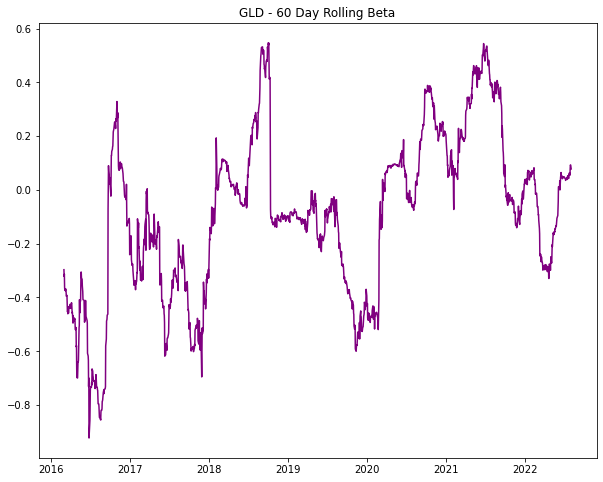

In [95]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
gld_rolling_60_beta.plot(figsize=(10,8),title = "GLD - 60 Day Rolling Beta",color = "purple") 

**Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.**

In [96]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
QQQ_rolling_60_covariance = daily_returns_df['QQQ'].rolling(window=60).cov(daily_returns_df['SPY'])
QQQ_rolling_60_covariance.tail()

2022-07-26    0.000394
2022-07-27    0.000386
2022-07-28    0.000387
2022-07-29    0.000391
2022-08-01    0.000373
dtype: float64

**Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the SPY.**

In [97]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (SPY)
# Review the last five rows of the beta information
QQQ_rolling_60_beta = QQQ_rolling_60_covariance / SPY_rolling_60_variance
QQQ_rolling_60_beta.tail()

2022-07-26    1.257949
2022-07-27    1.274552
2022-07-28    1.266941
2022-07-29    1.267932
2022-08-01    1.276353
dtype: float64

**Portfolio 2 - Step 3: Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.**

In [98]:
# Calculate the average of the 60-day rolling beta
QQQ_rolling_60_beta.mean()

1.187692415526482

**Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the title parameter, and adjust the figure size if necessary.**

<AxesSubplot:title={'center':'QQQ - 60 Day Rolling Beta'}>

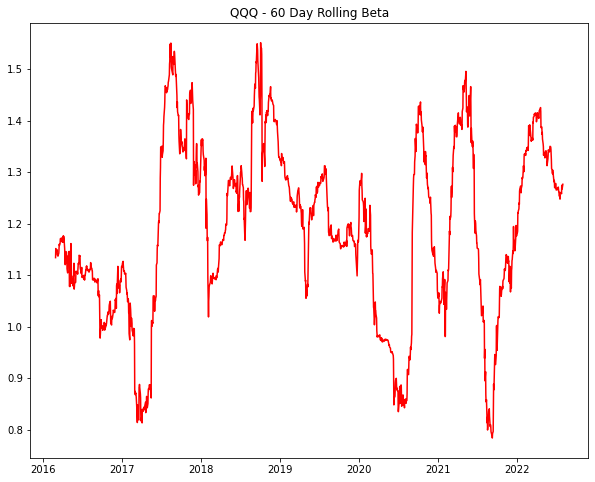

In [99]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
QQQ_rolling_60_beta.plot(figsize=(10,8),title = "QQQ - 60 Day Rolling Beta",color = "red") 

**Portfolio 3 - Step 1: Using the 60-day rolling window, the daily return data, and the SPY returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.**

In [100]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
xlv_rolling_60_covariance = daily_returns_df['XLV'].rolling(window=60).cov(daily_returns_df['SPY'])
xlv_rolling_60_covariance.tail()

2022-07-26    0.000206
2022-07-27    0.000193
2022-07-28    0.000195
2022-07-29    0.000194
2022-08-01    0.000183
dtype: float64

**Portfolio 3 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the SPY.**

In [101]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (SPY)
# Review the last five rows of the beta information
xlv_rolling_60_beta = xlv_rolling_60_covariance / SPY_rolling_60_variance
xlv_rolling_60_beta.tail()

2022-07-26    0.658841
2022-07-27    0.637751
2022-07-28    0.639884
2022-07-29    0.629331
2022-08-01    0.625502
dtype: float64

**Portfolio 3 - Step 3: Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.**

<AxesSubplot:title={'center':'XLV - 60 Day Rolling Beta'}>

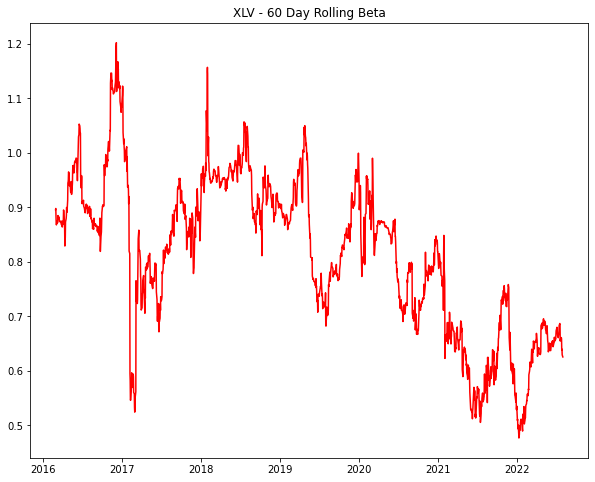

In [102]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
xlv_rolling_60_beta.plot(figsize=(10,8),title = "XLV - 60 Day Rolling Beta",color = "red") 